# Francis Bacon in a Word Cloud

# Description

This NLP (Natural Language Processing) exercise summarizes the most prominent concepts from Francis Bacon's "The Advancement of Learning" written in 1605. A small fraction of the +82,000 word text is prepared, processed, and visualized using python and the packages wordcloud and matplotlib.
A similar process can therefore be applied on business documents, trending topics, email chains, business Yammer postings, constructing tags to aid website navigation, etc.

In [1]:
from wordcloud import WordCloud as wc, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rcParams as rcp
import matplotlib.cm as cm
import numpy as np
import collections
%matplotlib inline

In [2]:
# read Francis Bacon's "The Advancement of Learning"
# the text was downloaded from the "Project Gutenberg" website as is
with open('C:\dataHub\BaconFrancisAdvancementOfLearning.txt', 'r', encoding="latin-1") as book:
    book_data = book.read() # default utf-8 encoding did not work, hence latin_1 was applied

In [3]:
# verify the text by displaying a sample
print(book_data[:512])

ï»¿                              _To the King_.

THERE were under the law, excellent King, both daily sacrifices and
freewill offerings; the one proceeding upon ordinary observance, the
other upon a devout cheerfulness: in like manner there belongeth to kings
from their servants both tribute of duty and presents of affection.  In
the former of these I hope I shall not live to be wanting, according to
my most humble duty and the good pleasure of your Majestyâs employments:
for the latter, I thought it more


In [4]:
# in order to manage stop words, a list should be created
stopwords = set(STOPWORDS)
wordcloud = wc(stopwords = stopwords, max_words = 1942,
              background_color = "white").generate(book_data) # the max word is of my choosing

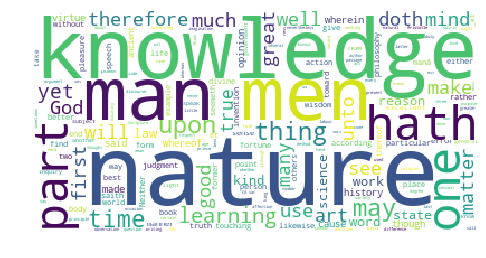

In [5]:
# Set up the figure dimensions and then display the word cloud
rcp['figure.figsize'] = 8, 16
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
# since the book was written in 1605, our stop words and theirs do not always overlap
# some words, like 'hath' and 'doth' are ancient stop words that ought to be processed as such
stopwords.update(['hath', 'therefore', 'may', 'doth', 'though', 'upon', 'For', 'I', 'But', 'And', 
                  'yet', 'men', 'The', 'much', 'unto', 'use', 'see', 'So', 'good', 'great', 'many', 
                  'things', 'first', 'make', 'part', 'one'])
# the list of stopwords can be extensive, therefore updating it should be driven by business requirements independently
wordcloud = wc(stopwords = stopwords, max_words = 1942,
              background_color = "black").generate(book_data) # the max word is of my choosing

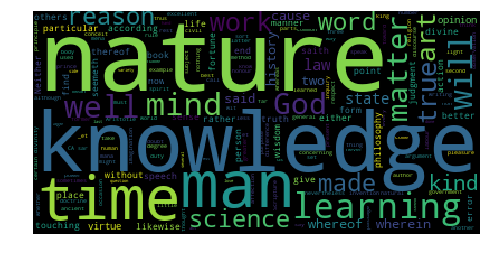

In [36]:
# Display the figure without the stopwords
rcp['figure.figsize'] = 8, 16
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Depending on your situation, business requirements for the analysis, etc., words such as 'man', 'men' may be deemed unnecessary or even sexist, and therefore further identification of stopwords may be necessary.
Terms such as 'knowledge', 'nature', 'man', 'learning' feature prominently because, well, Bacon sought to write about learning and knowledge. Further, it was 1605 and society was a lot more sexist.
At this point, you may need to analysis the most frequently mentioned terms further. One option is a simple count that can be visualized on a bar chart.

In [37]:
targeted_terms = [term for term in book_data.split() if term not in stopwords] 
counted_terms = collections.Counter(targeted_terms)
terms = []
counts = []

for term, count in counted_terms.most_common(10):
    terms.append(term)
    counts.append(count)

<BarContainer object of 10 artists>

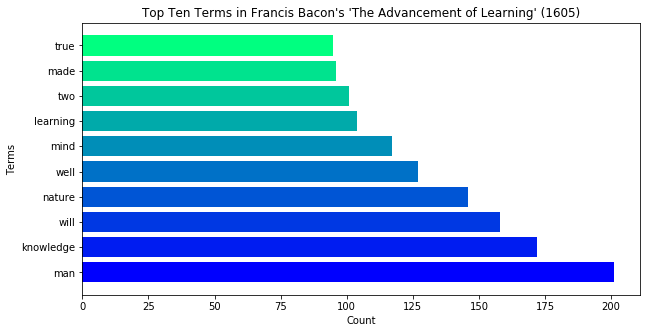

In [38]:
colors = cm.winter(np.linspace(0, 1, 10)) # there are tons of color schemes to choose from...it's currently Fall so...
rcp['figure.figsize'] = 10, 5
plt.title("Top Ten Terms in Francis Bacon's 'The Advancement of Learning' (1605)" )
plt.xlabel('Count')
plt.ylabel('Terms')
plt.barh(terms, counts, color = colors)

# Conclusion

As expected, terms such as 'knowledge', 'nature', 'man', 'learning' feature prominently.
This may provide input for further analysis with or among the affected participants.
The book has more than 82,000 words but only a fraction was included in the analysis. 
In a real business situation, text with many more words may need to be analyzed.
You may also use a pre-populated list of stopwords for filtering.
The text does not have to be from a book as demonstrated in this exercise: it can be exchanges from a company's Yammer portal, a long email chain among employees, or some other repository.


Some decisions boil down to analysis objectives. For instance, the term "man" appears almost as often as "men", but again, the historical context of Bacon's environment likely explains that. In this analysis, the term 'men' was placed in the stopword list and the term 'man' was included.

The concepts 'learning', 'mind', 'nature', 'will', 'knowledge', etc frequently appear in philosophical attempts to answer the question "what is knowledge?". It is therefore not surprising that they feature in the top ten.